# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data**

## Import Data

In [2]:
df = pd.read_csv(r"D:\Samuel\Open Datasets\Fraud Detection using AI-ML\AIML Dataset.csv")
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4164372,304,PAYMENT,13719.72,C218034570,0.00,0.00,M38835508,0.00,0.0,0,0
6006850,431,PAYMENT,1828.93,C1519378318,165691.91,163862.98,M406739095,0.00,0.0,0,0
749844,38,CASH_IN,112090.82,C1763768187,374594.86,486685.68,C1463507692,469285.12,357194.3,0,0
3146650,236,PAYMENT,3859.86,C499693535,304401.25,300541.39,M1890549758,0.00,0.0,0,0
6291638,664,CASH_IN,455389.75,C1433866000,20595.00,475984.75,C795236418,0.00,0.0,0,0


## Data Exploration

In [3]:
print(df.shape)
df.info()

(6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.shape[0]

6362620

In [9]:
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

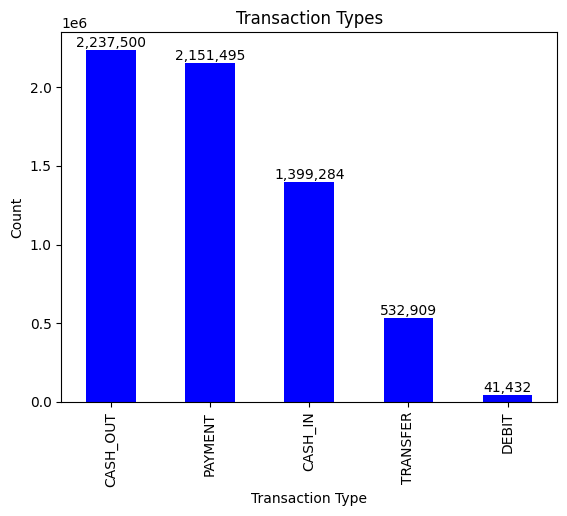

In [10]:
ax = df['type'].value_counts().plot(kind='bar', title="Transaction Types", color='blue')

labels = [f"{int(v.get_height()):,}" for v in ax.containers[0]]
ax.bar_label(ax.containers[0], labels=labels)

plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

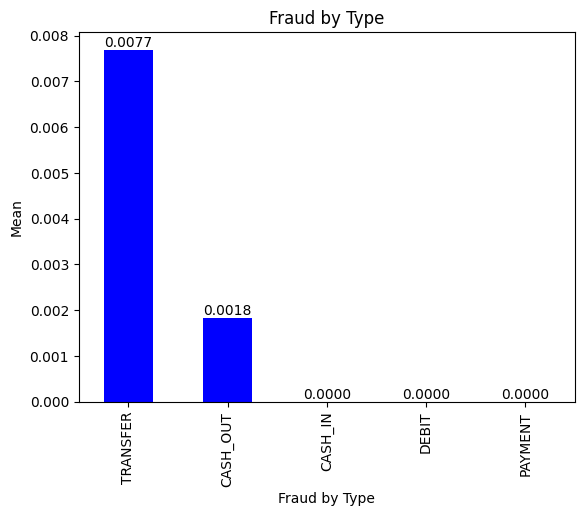

In [11]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

ax = fraud_by_type.plot(kind='bar', title="Fraud by Type", color='blue')

labels = [f"{v.get_height():.4f}" for v in ax.containers[0]]
ax.bar_label(ax.containers[0], labels=labels)

plt.xlabel("Fraud by Type")
plt.ylabel("Mean")
plt.show()

In [12]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

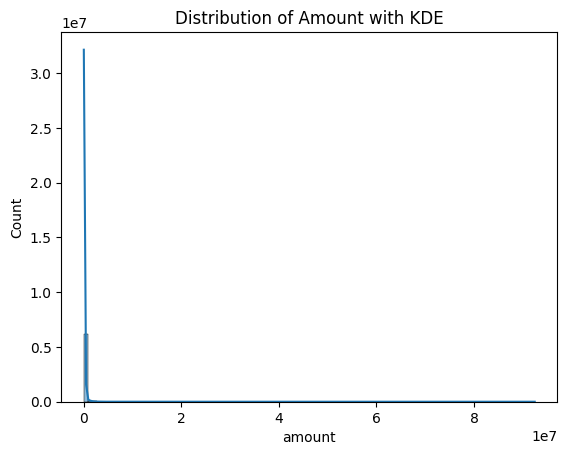

In [13]:
sns.histplot(df['amount'], kde=True, bins=100)
plt.title("Distribution of Amount with KDE")
plt.show()

In [14]:
from scipy.stats import skew, probplot

def check_skewness(series, bins=30):
    """
    Visualisasi distribusi data untuk mengecek skewness.
    Menampilkan Histogram+KDE, Boxplot, QQ Plot, dan nilai skewness.
    
    Parameters
    ----------
    series : pandas.Series
        Data numerik yang akan dianalisis
    bins : int
        Jumlah bin untuk histogram
    """
    data = series.dropna()  # buang missing values
    skewness = skew(data)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Histogram + KDE
    sns.histplot(data, kde=True, bins=bins, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram + KDE\nSkewness = {skewness:.2f}")
    axes[0].set_xlabel(series.name)
    axes[0].set_ylabel("Frequency")

    # 2. Boxplot
    sns.boxplot(x=data, ax=axes[1], color="lightgreen")
    axes[1].set_title("Boxplot")

    # 3. QQ Plot
    probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title("Q-Q Plot (Normal Distribution)")

    plt.tight_layout()
    plt.show()


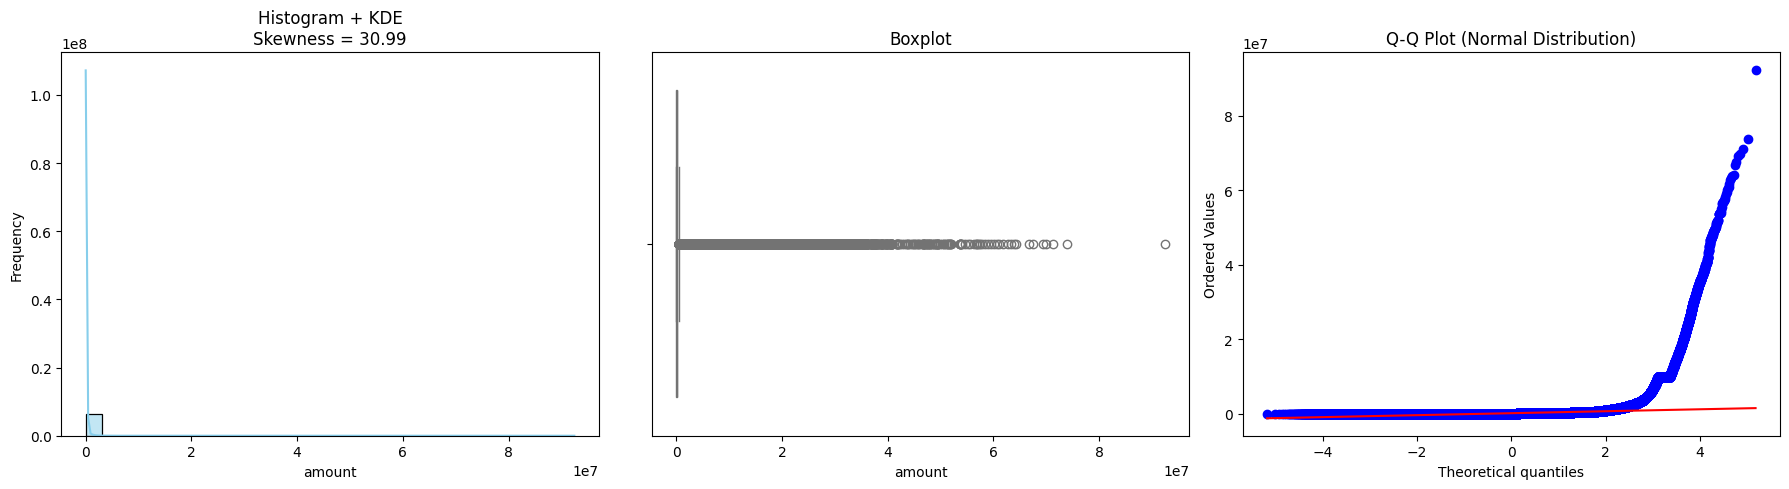

In [15]:
check_skewness(df['amount'])

Lambda Box-Cox: 0.11202817329653067
Lambda Yeo-Johnson: 0.11202815885111742


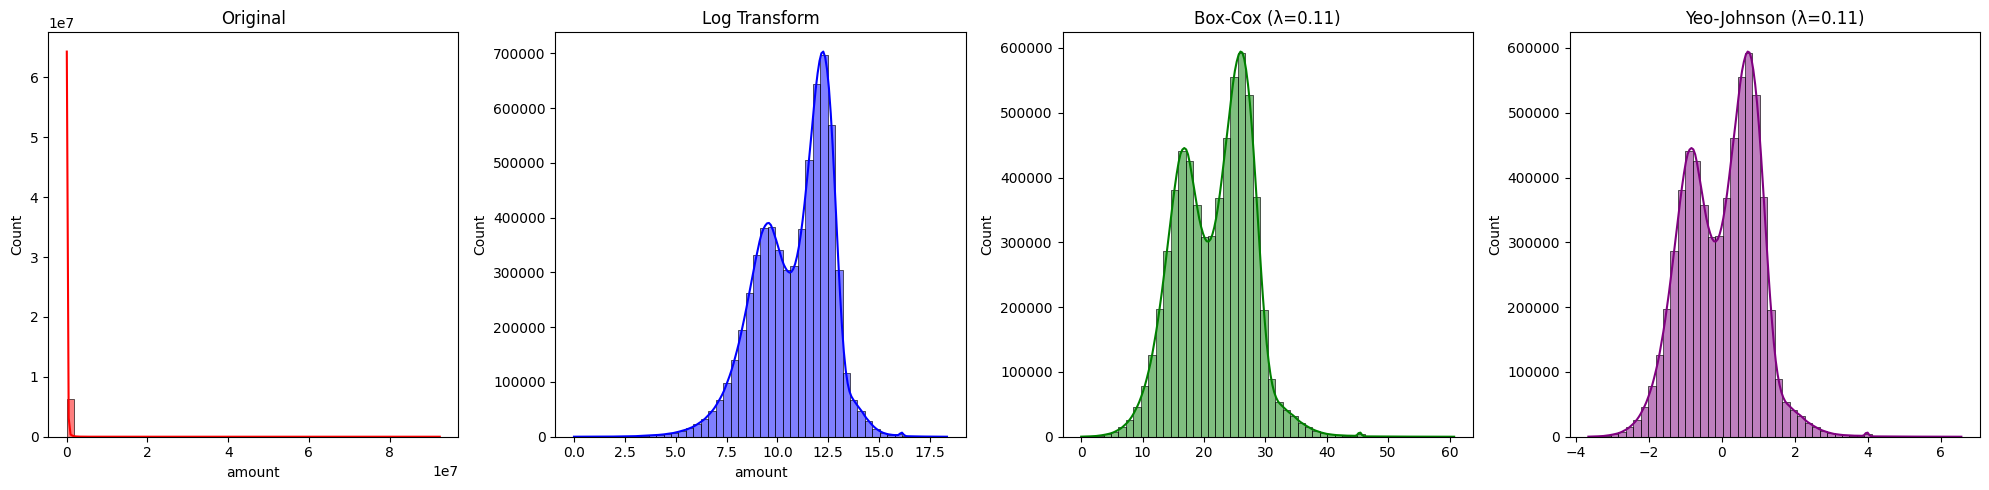

In [17]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

amount = df['amount']

# Log
log_amount = np.log1p(amount)

# Box-Cox
boxcox_amount, lambda_bc = stats.boxcox(amount + 1)

# Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
yeojohnson_amount = pt.fit_transform(amount.to_numpy().reshape(-1, 1)).flatten()

print("Lambda Box-Cox:", lambda_bc)
print("Lambda Yeo-Johnson:", pt.lambdas_[0])

fig, axes = plt.subplots(1, 4, figsize=(20,5))

sns.histplot(amount, bins=50, kde=True, ax=axes[0], color='red')
axes[0].set_title("Original")

sns.histplot(log_amount, bins=50, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Log Transform")

sns.histplot(boxcox_amount, bins=50, kde=True, ax=axes[2], color='green')
axes[2].set_title(f"Box-Cox (λ={lambda_bc:.2f})")

sns.histplot(yeojohnson_amount, bins=50, kde=True, ax=axes[3], color='purple')
axes[3].set_title(f"Yeo-Johnson (λ={pt.lambdas_[0]:.2f})")

plt.tight_layout()
plt.show()

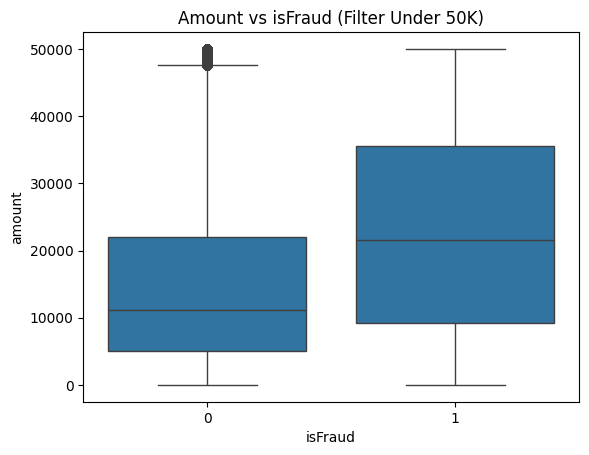

In [18]:
sns.boxplot(data=df[df['amount'] < 50000], x='isFraud', y='amount')
plt.title("Amount vs isFraud (Filter Under 50K)")
plt.show()

**Key conclusions about this boxplot**
* Fraudulent transactions tend to involve larger amounts of money than normal transactions, this is evident from the higher median.
* The variation (spread) of fraudulent transactions is also wider → there are small transactions but also very large ones.
* There are more outliers in normal transactions, although there are still large fraudulent amounts, but they are within the whisker range.

**Check Balance Difference (Origin & Destination)**
* Is there any negative values?

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [25]:
(df['balanceDiffOrig'] < 0).sum()

np.int64(1399253)

In [23]:
(df['balanceDiffDest'] < 0).sum()

np.int64(1238864)

In [26]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
